In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [2]:
import numpy as np
import pandas as pd 

In [3]:
data = pd.read_excel("COVID-19.xlsx")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 19 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Позначка часу                                                                   3265 non-null   object 
 1   Age (вік)                                                                       3264 non-null   object 
 2   Gender (стать)                                                                  3259 non-null   object 
 3   Region (Регіон)                                                                 3247 non-null   object 
 4   Do you smoke? (Ви палите?)                                                      3231 non-null   object 
 5   Have you had Covid`19 this year? (Чи хворіли Ви на  Covid`19 цього року?)       3264 non-null   object 
 6   IgM level (Рівен

In [5]:
data.head()

,Позначка часу,Age (вік),Gender (стать),Region (Регіон),Do you smoke? (Ви палите?),Have you had Covid`19 this year? (Чи хворіли Ви на Covid`19 цього року?),"IgM level (Рівень імуноглобуліна IgM, якщо відомо)","IgG level (Рівень імуноглобуліна IgG, якщо відомо)",Blood group (Група крові),Do you vaccinated influenza? (Ви вакциновані від грипу?),Do you vaccinated tuberculosis? (Ви вакциновані від туберкульозу?),Have you had influenza this year? (Чи хворіли грипом Ви цього року?),Have you had tuberculosis this year? (Чи хворіли Ви туберкульозом цього року?),Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,2020-09-20 11:23:15,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),<0.9 (negative/негативний),0.9-1.1 (indefinable/невизначений),2,Yes,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-09-20 11:23:15,23-40,Female (Жінка),"Ukraine, Chernivtsi",No,Yes,>1.1 (positive/позитивний),0.9-1.1 (indefinable/невизначений),2,No,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-09-20 11:23:15,23-40,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),<0.9 (negative/негативний),<0.9 (negative/негативний),2,No,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-09-20 11:23:15,40-65,Male (Чоловік),"Ukraine, Chernivtsi",No,No,<0.9 (negative/негативний),<0.9 (negative/негативний),2,No,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-09-20 11:23:15,16-22,Male (Чоловік),"Ukraine, Lviv (Львів)",No,Yes,>1.1 (positive/позитивний),<0.9 (negative/негативний),1,No,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data = data.drop(columns = ["Позначка часу", "Unnamed: 13","Unnamed: 14", "Unnamed: 15", "Unnamed: 16", "Unnamed: 17", "Unnamed: 18"],axis=1)

In [7]:
[column for column in data.columns]

['Age (вік)',
 'Gender (стать)',
 'Region (Регіон)',
 'Do you smoke? (Ви палите?)',
 'Have you had Covid`19 this year? (Чи хворіли Ви на  Covid`19 цього року?)',
 'IgM level (Рівень імуноглобуліна IgM, якщо відомо)',
 'IgG level (Рівень імуноглобуліна IgG, якщо відомо)',
 'Blood group (Група крові)',
 'Do you vaccinated influenza? (Ви вакциновані від грипу?)',
 'Do you vaccinated tuberculosis? (Ви вакциновані від туберкульозу?)',
 'Have you had influenza this year? (Чи хворіли грипом Ви цього року?)',
 'Have you had tuberculosis this year? (Чи хворіли Ви туберкульозом цього року?)']

In [8]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values." 
              + "Data size: " + str(df.size))
        return mis_val_table_ren_columns

In [9]:
missing_values_table(data)

Your selected dataframe has 12 columns.
There are 12 columns that have missing values.Data size: 39180


,Missing Values,% of Total Values
"IgM level (Рівень імуноглобуліна IgM, якщо відомо)",58,1.8
"IgG level (Рівень імуноглобуліна IgG, якщо відомо)",58,1.8
Blood group (Група крові),37,1.1
Do you smoke? (Ви палите?),34,1.0
Region (Регіон),18,0.6
Do you vaccinated influenza? (Ви вакциновані від грипу?),12,0.4
Gender (стать),6,0.2
Have you had influenza this year? (Чи хворіли грипом Ви цього року?),4,0.1
Have you had tuberculosis this year? (Чи хворіли Ви туберкульозом цього року?),4,0.1
Do you vaccinated tuberculosis? (Ви вакциновані від туберкульозу?),3,0.1


In [10]:
data = data.dropna()

In [11]:
data =  data.rename(columns={'Age (вік)': 'Age', 'Gender (стать)': 'Gender',
                            'Do you smoke? (Ви палите?)': 'Smoke', 'Region (Регіон)': 'Region',
                            'Have you had Covid`19 this year? (Чи хворіли Ви на  Covid`19 цього року?)': 'Covid', 
                             'IgM level (Рівень імуноглобуліна IgM, якщо відомо)': 'IgM',
                            'IgG level (Рівень імуноглобуліна IgG, якщо відомо)': 'IgG',
                             'Blood group (Група крові)': 'Blood_group',
                            'Do you vaccinated influenza? (Ви вакциновані від грипу?)': 'Vac_influenza', 
                             'Do you vaccinated tuberculosis? (Ви вакциновані від туберкульозу?)': 'Vac_tuberculosis',
                            'Have you had influenza this year? (Чи хворіли грипом Ви цього року?)': 'Influenza', 
                             'Have you had tuberculosis this year? (Чи хворіли Ви туберкульозом цього року?)': 'Tuberculosis'})

In [12]:
data.head(10)

,Age,Gender,Region,Smoke,Covid,IgM,IgG,Blood_group,Vac_influenza,Vac_tuberculosis,Influenza,Tuberculosis
0,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),<0.9 (negative/негативний),0.9-1.1 (indefinable/невизначений),2,Yes,Yes,No,No
1,23-40,Female (Жінка),"Ukraine, Chernivtsi",No,Yes,>1.1 (positive/позитивний),0.9-1.1 (indefinable/невизначений),2,No,Yes,No,No
2,23-40,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),<0.9 (negative/негативний),<0.9 (negative/негативний),2,No,Yes,Yes,No
3,40-65,Male (Чоловік),"Ukraine, Chernivtsi",No,No,<0.9 (negative/негативний),<0.9 (negative/негативний),2,No,Yes,No,No
4,16-22,Male (Чоловік),"Ukraine, Lviv (Львів)",No,Yes,>1.1 (positive/позитивний),<0.9 (negative/негативний),1,No,Yes,Yes,No
5,16-22,Male (Чоловік),"Ukraine, Lviv (Львів)",No,No,<0.9 (negative/негативний),<0.9 (negative/негативний),2,Yes,Yes,No,No
6,16-22,Male (Чоловік),"Ukraine, Lviv (Львів)",No,No,<0.9 (negative/негативний),<0.9 (negative/негативний),1,No,No,No,No
7,23-40,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe,<0.9 (negative/негативний),0.9-1.1 (indefinable/невизначений),1,No,Yes,Maybe (можливо),No
8,23-40,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),<0.9 (negative/негативний),<0.9 (negative/негативний),2,No,Yes,Maybe (можливо),No
9,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,No,<0.9 (negative/негативний),<0.9 (negative/негативний),2,No,Yes,No,No


In [13]:
for col in data:
    print(f"{col} : {data[col].unique()}")

Age : ['40-65' '23-40' '16-22' '>65' '0-15' 'Age (вік)']
Gender : ['Female (Жінка)' 'Male (Чоловік)' 'Gender (стать)']
Region : ['Ukraine, Lviv (Львів)' 'Ukraine, Chernivtsi' 'Germany' 'Other (Інше)'
 'Ukraine, Chernivtsi (Чернівці)' 'Region (Регіон)']
Smoke : ['No' 'Yes' 'Do you smoke? (Ви палите?)']
Covid : ['Maybe (можливо)' 'Yes' 'No' 'Maybe'
 'Have you had Covid`19 this year? (Чи хворіли Ви на  Covid`19 цього року?)']
IgM : ['<0.9 (negative/негативний)' '>1.1 (positive/позитивний)'
 '0.9-1.1 (indefinable/невизначений)'
 'IgM level (Рівень імуноглобуліна IgM, якщо відомо)']
IgG : ['0.9-1.1 (indefinable/невизначений)' '<0.9 (negative/негативний)'
 '>1.1 (positive/позитивний)'
 'IgG level (Рівень імуноглобуліна IgG, якщо відомо)']
Blood_group : [2 1 4 3 'Blood group (Група крові)']
Vac_influenza : ['Yes' 'No' 'Maybe (можливо)' 'Maybe ' 'Maybe'
 'Do you vaccinated influenza? (Ви вакциновані від грипу?)']
Vac_tuberculosis : ['Yes' 'No' 'Maybe (можливо)' 'Maybe ' 'Maybe' 'Maybe (можливо

In [14]:
data = data.replace({'Region': 'Ukraine, Chernivtsi',}, 'Ukraine, Chernivtsi (Чернівці)')
data = data.replace({'Covid': 'Maybe (можливо)',}, 'Maybe')
data = data.replace({'Vac_influenza': 'Maybe (можливо)',}, 'Maybe')
data = data.replace({'Vac_influenza': 'Maybe ',}, 'Maybe')
data = data.replace({'Vac_tuberculosis': 'Maybe (можливо)',}, 'Maybe')
data = data.replace({'Vac_tuberculosis': 'Maybe (можливо)(можливо)',}, 'Maybe')
data = data.replace({'Vac_tuberculosis': 'Maybe ',}, 'Maybe')
data = data.replace({'Influenza': 'Maybe (можливо)',}, 'Maybe')
data = data.replace({'Influenza': 'Maybe ',}, 'Maybe')
data = data.replace({'Tuberculosis': 'Maybe (можливо)',}, 'Maybe')


data = data.drop(data[data.Age =='Age (вік)'].index)
data = data.drop(data[data.Gender =='Gender (стать)'].index)
data = data.drop(data[data.Region =='Region (Регіон)'].index)
data = data.drop(data[data.Smoke =='Do you smoke? (Ви палите?)'].index)
data = data.drop(data[data.Covid =='Have you had Covid`19 this year? (Чи хворіли Ви на  Covid`19 цього року?)'].index)
data = data.drop(data[data.IgM =='IgM level (Рівень імуноглобуліна IgM, якщо відомо)'].index)
data = data.drop(data[data.IgG =='IgG level (Рівень імуноглобуліна IgG, якщо відомо)'].index)
data = data.drop(data[data.Blood_group  =='Blood group (Група крові)'].index)
data = data.drop(data[data.Vac_influenza  =='Do you vaccinated influenza? (Ви вакциновані від грипу?)'].index)
data = data.drop(data[data.Vac_tuberculosis  =='Do you vaccinated tuberculosis? (Ви вакциновані від туберкульозу?)'].index)
data = data.drop(data[data.Influenza  == 'Have you had influenza this year? (Чи хворіли грипом Ви цього року?)'].index)
data = data.drop(data[data.Tuberculosis  =='Have you had tuberculosis this year? (Чи хворіли Ви туберкульозом цього року?)'].index)

In [15]:
for col in data:
    print(f"{col} : {data[col].unique()}")

Age : ['40-65' '23-40' '16-22' '>65' '0-15']
Gender : ['Female (Жінка)' 'Male (Чоловік)']
Region : ['Ukraine, Lviv (Львів)' 'Ukraine, Chernivtsi (Чернівці)' 'Germany'
 'Other (Інше)']
Smoke : ['No' 'Yes']
Covid : ['Maybe' 'Yes' 'No']
IgM : ['<0.9 (negative/негативний)' '>1.1 (positive/позитивний)'
 '0.9-1.1 (indefinable/невизначений)']
IgG : ['0.9-1.1 (indefinable/невизначений)' '<0.9 (negative/негативний)'
 '>1.1 (positive/позитивний)']
Blood_group : [2 1 4 3]
Vac_influenza : ['Yes' 'No' 'Maybe']
Vac_tuberculosis : ['Yes' 'No' 'Maybe']
Influenza : ['No' 'Yes' 'Maybe']
Tuberculosis : ['No' 'Maybe' 'Yes']


In [16]:
data.describe()

,Age,Gender,Region,Smoke,Covid,IgM,IgG,Blood_group,Vac_influenza,Vac_tuberculosis,Influenza,Tuberculosis
count,3100,3100,3100,3100,3100,3100,3100,3100,3100,3100,3100,3100
unique,5,2,4,2,3,3,3,4,3,3,3,3
top,23-40,Female (Жінка),"Ukraine, Lviv (Львів)",No,No,<0.9 (negative/негативний),<0.9 (negative/негативний),2,No,Yes,No,No
freq,1103,1693,2905,2371,1671,2554,2484,1308,2525,2407,2212,3094


In [17]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns 
        self.mappings= []

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                le  = LabelEncoder()
                output[col] = le.fit_transform(output[col])
                le_name_mapping = {col: dict(zip(le.classes_, le.transform(le.classes_)))}
                self.mappings.append(le_name_mapping)
        else:
            for colname,col in output.iteritems():
                le  = LabelEncoder()
                output[colname] = le.fit_transform(col)
                le_name_mapping = {colname: dict(zip(le.classes_, le.transform(le.classes_)))}
                self.mappings.append(le_name_mapping)
        return output, self.mappings

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)


In [18]:
encoded_data, mappings = MultiColumnLabelEncoder(columns = ['Age', 'Gender', 'Region', 'Smoke', 'Covid', 'IgM', 'IgG', 'Vac_influenza', 'Vac_tuberculosis', 'Influenza',
       'Tuberculosis']).fit_transform(data)
encoded_data['Blood_group'] = encoded_data['Blood_group'].astype(str).astype(int)

In [19]:
data

,Age,Gender,Region,Smoke,Covid,IgM,IgG,Blood_group,Vac_influenza,Vac_tuberculosis,Influenza,Tuberculosis
0,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe,<0.9 (negative/негативний),0.9-1.1 (indefinable/невизначений),2,Yes,Yes,No,No
1,23-40,Female (Жінка),"Ukraine, Chernivtsi (Чернівці)",No,Yes,>1.1 (positive/позитивний),0.9-1.1 (indefinable/невизначений),2,No,Yes,No,No
2,23-40,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe,<0.9 (negative/негативний),<0.9 (negative/негативний),2,No,Yes,Yes,No
3,40-65,Male (Чоловік),"Ukraine, Chernivtsi (Чернівці)",No,No,<0.9 (negative/негативний),<0.9 (negative/негативний),2,No,Yes,No,No
4,16-22,Male (Чоловік),"Ukraine, Lviv (Львів)",No,Yes,>1.1 (positive/позитивний),<0.9 (negative/негативний),1,No,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
3228,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Yes,>1.1 (positive/позитивний),>1.1 (positive/позитивний),2,No,No,No,No
3234,23-40,Female (Жінка),"Ukraine, Lviv (Львів)",No,Yes,<0.9 (negative/негативний),>1.1 (positive/позитивний),2,No,Yes,Yes,No
3235,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Yes,<0.9 (negative/негативний),<0.9 (negative/негативний),3,Yes,Yes,No,No
3254,23-40,Female (Жінка),"Ukraine, Lviv (Львів)",No,Yes,<0.9 (negative/негативний),0.9-1.1 (indefinable/невизначений),1,Yes,Yes,No,No


In [20]:
encoded_data

,Age,Gender,Region,Smoke,Covid,IgM,IgG,Blood_group,Vac_influenza,Vac_tuberculosis,Influenza,Tuberculosis
0,3,0,3,0,0,1,0,2,2,2,1,1
1,2,0,2,0,2,2,0,2,1,2,1,1
2,2,0,3,0,0,1,1,2,1,2,2,1
3,3,1,2,0,1,1,1,2,1,2,1,1
4,1,1,3,0,2,2,1,1,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3228,3,0,3,0,2,2,2,2,1,1,1,1
3234,2,0,3,0,2,1,2,2,1,2,2,1
3235,3,0,3,0,2,1,1,3,2,2,1,1
3254,2,0,3,0,2,1,0,1,2,2,1,1


In [21]:
mappings

[{'Age': {'0-15': 0, '16-22': 1, '23-40': 2, '40-65': 3, '>65': 4}},
 {'Gender': {'Female (Жінка)': 0, 'Male (Чоловік)': 1}},
 {'Region': {'Germany': 0,
   'Other (Інше)': 1,
   'Ukraine, Chernivtsi (Чернівці)': 2,
   'Ukraine, Lviv (Львів)': 3}},
 {'Smoke': {'No': 0, 'Yes': 1}},
 {'Covid': {'Maybe': 0, 'No': 1, 'Yes': 2}},
 {'IgM': {'0.9-1.1 (indefinable/невизначений)': 0,
   '<0.9 (negative/негативний)': 1,
   '>1.1 (positive/позитивний)': 2}},
 {'IgG': {'0.9-1.1 (indefinable/невизначений)': 0,
   '<0.9 (negative/негативний)': 1,
   '>1.1 (positive/позитивний)': 2}},
 {'Vac_influenza': {'Maybe': 0, 'No': 1, 'Yes': 2}},
 {'Vac_tuberculosis': {'Maybe': 0, 'No': 1, 'Yes': 2}},
 {'Influenza': {'Maybe': 0, 'No': 1, 'Yes': 2}},
 {'Tuberculosis': {'Maybe': 0, 'No': 1, 'Yes': 2}}]

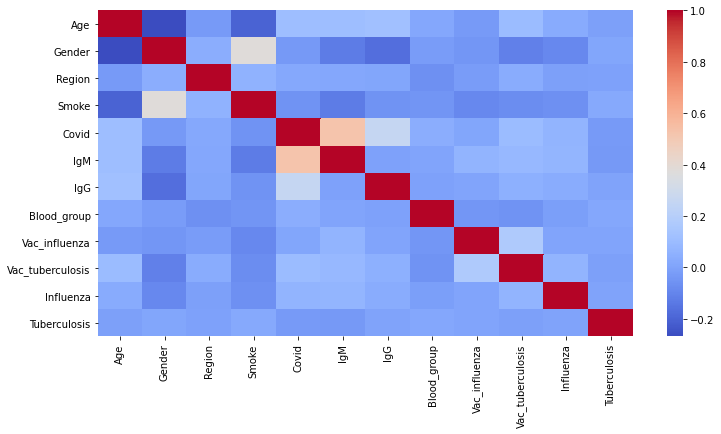

In [32]:
covid_data = encoded_data
plt.figure(figsize=(12,6))
sns.heatmap(covid_data.corr(),cmap='coolwarm')

In [34]:
plt.figure(figsize=(20,12))
covid_data.corrwith(covid_data['Covid'])

Age                 0.110437
Gender             -0.031496
Region              0.022444
Smoke              -0.054385
Covid               1.000000
IgM                 0.524677
IgG                 0.258166
Blood_group         0.042073
Vac_influenza       0.013101
Vac_tuberculosis    0.098533
Influenza           0.067124
Tuberculosis       -0.030101
dtype: float64

<Figure size 1440x864 with 0 Axes>

In [35]:
for col in covid_data:
    print(col)
    print(matthews_corrcoef(covid_data[col], covid_data['Covid']))
    print(" ")

Age
0.08991676585706317
 
Gender
0.16920294538294361
 
Region
0.014975011286234375
 
Smoke
0.09019461946935867
 
Covid
1.0
 
IgM
0.5037384038652636
 
IgG
0.2495389255456485
 
Blood_group
0.03731400197768729
 
Vac_influenza
-0.03077145632535551
 
Vac_tuberculosis
0.09747525706989846
 
Influenza
0.08739769472579288
 
Tuberculosis
0.013361994769945405
 


Age
0      42
1     794
2    1103
3     991
4     170
dtype: int64


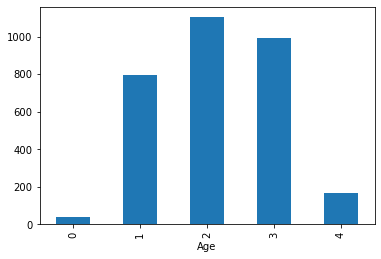

In [36]:
grouped_age_data=covid_data.groupby(by='Age').size()
print(grouped_age_data)
 
# Generating a bar chart for a single column
%matplotlib inline
grouped_age_data.plot.bar()

Covid
0     507
1    1671
2     922
dtype: int64


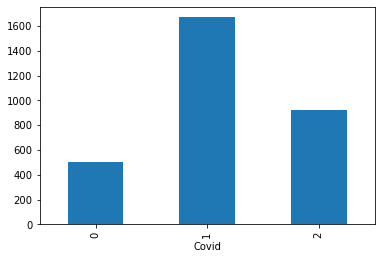

In [37]:
grouped_covid_data=covid_data.groupby(by='Covid').size()
print(grouped_covid_data)
 
# Generating a bar chart for a single column
%matplotlib inline
grouped_covid_data.plot.bar()

Gender
0    1693
1    1407
dtype: int64


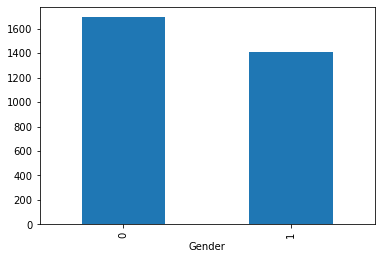

In [38]:
grouped_gender_data=covid_data.groupby(by='Gender').size()
print(grouped_gender_data)
 
# Generating a bar chart for a single column
%matplotlib inline
grouped_gender_data.plot.bar()

Smoke
0    2371
1     729
dtype: int64


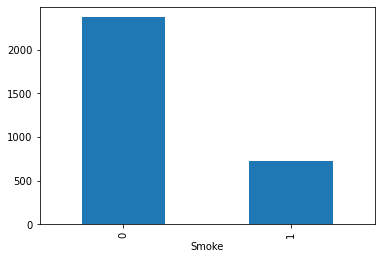

In [39]:
grouped_smoke_data=covid_data.groupby(by='Smoke').size()
print(grouped_smoke_data)
 
# Generating a bar chart for a single column
%matplotlib inline
grouped_smoke_data.plot.bar()

Blood_group
1    1072
2    1308
3     475
4     245
dtype: int64


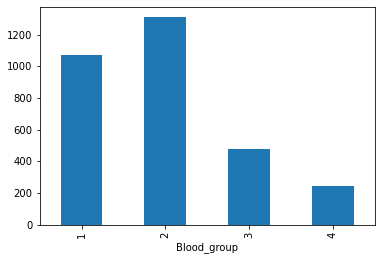

In [40]:
grouped_blood_data=covid_data.groupby(by='Blood_group').size()
print(grouped_blood_data)
 
# Generating a bar chart for a single column
%matplotlib inline
grouped_blood_data.plot.bar()

Vac_influenza
0      90
1    2525
2     485
dtype: int64


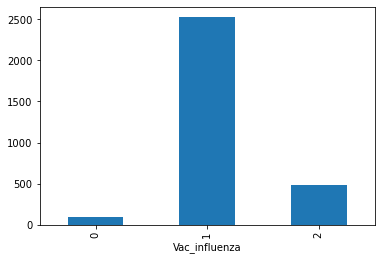

In [41]:
grouped_influenza_data=covid_data.groupby(by='Vac_influenza').size()
print(grouped_influenza_data)
 
# Generating a bar chart for a single column
%matplotlib inline
grouped_influenza_data.plot.bar()

Vac_tuberculosis
0     229
1     464
2    2407
dtype: int64


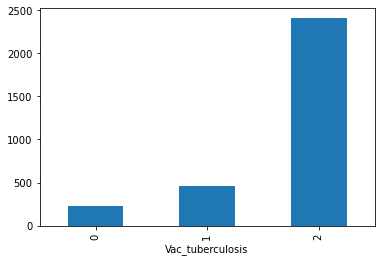

In [42]:
grouped_tuberc_data=covid_data.groupby(by='Vac_tuberculosis').size()
print(grouped_tuberc_data)
 
# Generating a bar chart for a single column
%matplotlib inline
grouped_tuberc_data.plot.bar()

Influenza
0     384
1    2212
2     504
dtype: int64


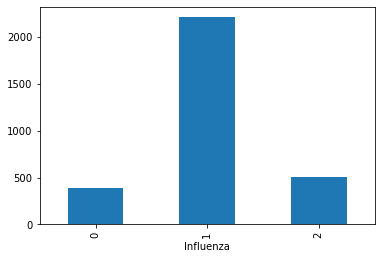

In [43]:
grouped_influenz_data=covid_data.groupby(by='Influenza').size()
print(grouped_influenz_data)
 
# Generating a bar chart for a single column
%matplotlib inline
grouped_influenz_data.plot.bar()

Tuberculosis
0       4
1    3094
2       2
dtype: int64


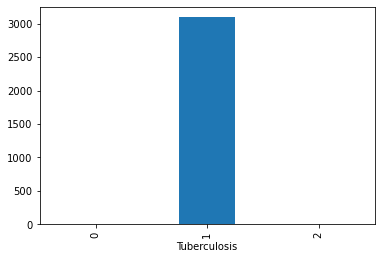

In [44]:
grouped_tuberculosis_data=covid_data.groupby(by='Tuberculosis').size()
print(grouped_tuberculosis_data)
 
# Generating a bar chart for a single column
%matplotlib inline
grouped_tuberculosis_data.plot.bar()

IgM
0      90
1    2554
2     456
dtype: int64


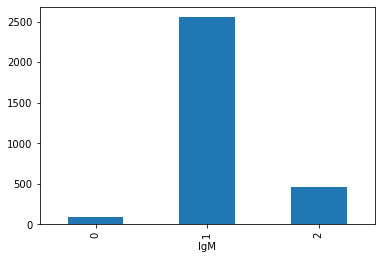

In [45]:
grouped_igm_data=covid_data.groupby(by='IgM').size()
print(grouped_igm_data)
 
# Generating a bar chart for a single column
%matplotlib inline
grouped_igm_data.plot.bar()

IgG
0     283
1    2484
2     333
dtype: int64


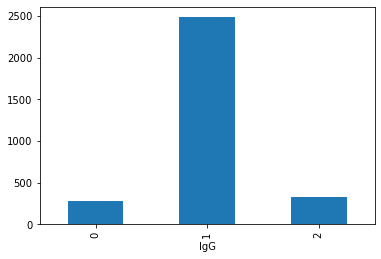

In [46]:
grouped_igg_data=covid_data.groupby(by='IgG').size()
print(grouped_igg_data)
 
# Generating a bar chart for a single column
%matplotlib inline
grouped_igg_data.plot.bar()

In [33]:
catColumnsPos = [covid_data.columns.get_loc(col) for col in list(covid_data.columns)]


In [34]:
dfMatrix = covid_data.to_numpy()

In [35]:
# Choose optimal K using Elbow method
import plotnine
import ggplot
cost = []
for cluster in range(1, 10):
    try:
        k_modes = KModes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        k_modes.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(k_modes.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break
print(cost)
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 10), 'Cost':cost})
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 7,
               nudge_y = 3) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [36]:
from kmodes.kmodes  import KModes
k_modes = KModes(n_jobs = -1, n_clusters = 5, init = 'Huang', random_state = 0)
k_modes.fit_predict(dfMatrix, categorical = catColumnsPos)

array([1, 3, 2, ..., 0, 3, 3], dtype=uint16)

In [37]:
k_modes.cluster_centroids_

array([[3, 1, 3, 0, 1, 1, 1, 3, 1, 2, 1, 1],
       [3, 0, 3, 0, 0, 1, 1, 1, 1, 2, 1, 1],
       [2, 0, 3, 0, 1, 1, 1, 1, 1, 2, 2, 1],
       [2, 0, 3, 0, 2, 1, 2, 2, 1, 2, 1, 1],
       [1, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 1]])

In [38]:
data_with_clusters = encoded_data

In [39]:
# Add the cluster to the dataframe
data_with_clusters['Cluster Labels'] = k_modes.labels_
data_with_clusters['Segment'] = data_with_clusters['Cluster Labels'].map({0:'First', 1:'Second', 2:'Third', 3: 'Fourth', 4: 'Fifth'})
# Order the cluster
data_with_clusters['Segment'] = data_with_clusters['Segment'].astype('category')
data_with_clusters['Segment'] = data_with_clusters['Segment'].cat.reorder_categories(['First','Second','Third', 'Fourth', 'Fifth'])

In [40]:
# Cluster interpretation
data_with_clusters.rename(columns = {'Cluster Labels':'Total'}, inplace = True)
data_with_clusters.groupby('Segment').agg(
    {
        'Total':'count',
        'Age': lambda x: x.value_counts().index[0],
        'Gender': lambda x: x.value_counts().index[0],
        'Region': lambda x: x.value_counts().index[0],
        'Smoke': lambda x: x.value_counts().index[0],
        'Covid':  lambda x: x.value_counts().index[0],
        'IgM': 'mean',
        'IgG': 'mean',
        'Blood_group':  lambda x: x.value_counts().index[0],
        'Vac_influenza':  lambda x: x.value_counts().index[0],
        'Influenza':  lambda x: x.value_counts().index[0],
        'Tuberculosis':  lambda x: x.value_counts().index[0],
        'Vac_tuberculosis':  lambda x: x.value_counts().index[0],
    }
).reset_index()

,Segment,Total,Age,Gender,Region,Smoke,Covid,IgM,IgG,Blood_group,Vac_influenza,Influenza,Tuberculosis,Vac_tuberculosis
0,First,925,3,1,3,0,1,1.091892,0.910270,3,1,1,1,2
1,Second,745,3,0,3,0,0,1.130201,1.006711,1,1,1,1,2
2,Third,460,2,0,3,0,1,1.115217,0.971739,1,1,2,1,2
3,Fourth,423,2,0,3,0,2,1.297872,1.456265,2,1,1,1,2
4,Fifth,547,1,1,3,1,1,1.009141,0.904936,2,1,1,1,2


Models trainings

In [22]:
y = encoded_data["Covid"]
X = encoded_data.drop(columns = "Covid")
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,train_size=0.75)

In [23]:
print(f"Train data length = {len(y_train)}")
print(f"Test data length = {len(y_test)}")

Train data length = 2325
Test data length = 775


DecisionTreeClassifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(max_depth = 100, max_features ='log2')
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=100, max_features='log2')

In [25]:
decision_tree_classifier_y_pred = decision_tree_classifier.predict(X_test)


In [391]:
print("Accuracy:",metrics.accuracy_score(y_test, decision_tree_classifier_y_pred))

Accuracy: 0.864516129032258


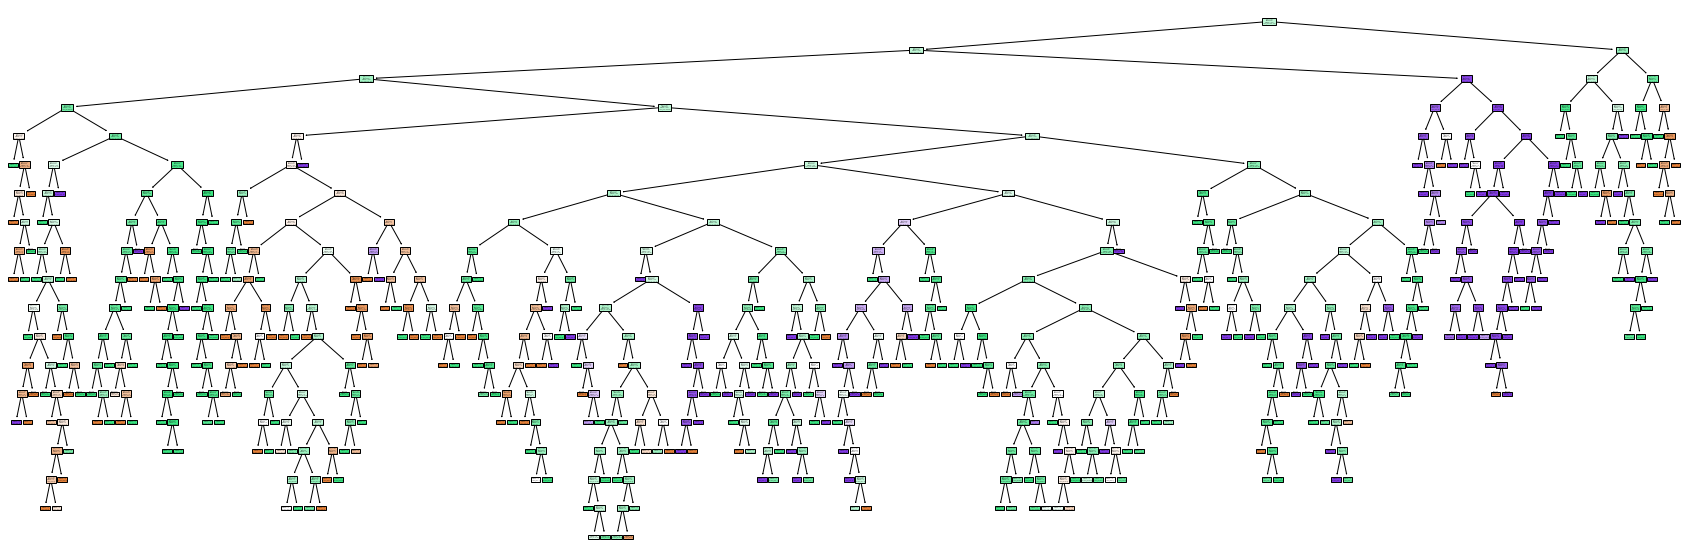

In [392]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,10))
plot_tree(decision_tree_classifier, filled=True);

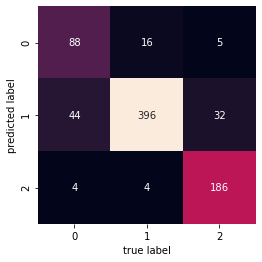

In [443]:
mat = confusion_matrix(y_test, decision_tree_classifier_y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [444]:
print(classification_report(y_test, decision_tree_classifier_y_pred))

              precision    recall  f1-score   support

           0       0.81      0.65      0.72       136
           1       0.84      0.95      0.89       416
           2       0.96      0.83      0.89       223

    accuracy                           0.86       775
   macro avg       0.87      0.81      0.83       775
weighted avg       0.87      0.86      0.86       775



In [326]:
y_score = decision_tree_classifier.predict_proba(X_test)
y_score = pd.DataFrame(y_score, columns=['Maybe', 'No', 'Yes'])
y_score.head(10)

,Maybe,No,Yes
0,0.000000,1.000000,0.000000
1,0.100000,0.800000,0.100000
2,0.600000,0.400000,0.000000
3,0.000000,0.969697,0.030303
4,0.111111,0.888889,0.000000
5,0.000000,0.000000,1.000000
6,0.000000,1.000000,0.000000
7,0.555556,0.444444,0.000000
8,0.000000,1.000000,0.000000
9,0.000000,0.000000,1.000000


SVC

In [327]:
from sklearn import svm
svm_classifier = svm.SVC(decision_function_shape='ovo', probability=True, gamma=0.1, C=0.7)
svm_classifier.fit(X_train, y_train)

SVC(C=0.7, decision_function_shape='ovo', gamma=0.1, probability=True)

In [328]:
svm_classifier_y_pred=svm_classifier.predict(X_test)

In [329]:
print("Accuracy:",metrics.accuracy_score(y_test, svm_classifier_y_pred))

Accuracy: 0.7780645161290323


RandomForestClassifier

In [439]:
randomm_forest_classifier = RandomForestClassifier(max_depth=100, n_estimators=15)
randomm_forest_classifier.fit(X_train, y_train)
randomm_forest_classifier_y_pred=randomm_forest_classifier.predict(X_test)

In [440]:
print("Accuracy:",metrics.accuracy_score(y_test, randomm_forest_classifier_y_pred))

Accuracy: 0.863225806451613


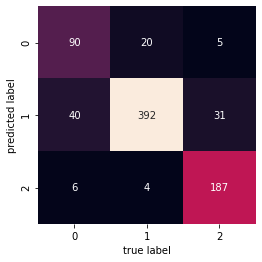

In [441]:
mat = confusion_matrix(y_test, randomm_forest_classifier_y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [332]:
print(classification_report(y_test, randomm_forest_classifier_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.66      0.72       136
           1       0.85      0.95      0.90       416
           2       0.95      0.84      0.89       223

    accuracy                           0.87       775
   macro avg       0.87      0.82      0.84       775
weighted avg       0.87      0.87      0.86       775



MultinomialNB

In [333]:
from sklearn.naive_bayes import MultinomialNB

multinom_naive_bayes_classifier = MultinomialNB()
multinom_naive_bayes_classifier.fit(X_train, y_train)

MultinomialNB()

In [334]:
multinom_naive_bayes_classifier_y_pred=multinom_naive_bayes_classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, multinom_naive_bayes_classifier_y_pred))

Accuracy: 0.6193548387096774


LogisticRegression

In [335]:
from sklearn.linear_model import LogisticRegression
logistic_regression_classififer = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=0.1)
logistic_regression_classififer.fit(X_train, y_train)
n_scores = cross_val_score(logistic_regression_classififer, X_test, y_test, scoring='accuracy', n_jobs=-1)
logistic_regression_classififer_y_pred=logistic_regression_classififer.predict(X_test)


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [336]:
print("Accuracy:",metrics.accuracy_score(y_test, logistic_regression_classififer_y_pred))

Accuracy: 0.7483870967741936


User data

In [369]:
age = int(input("Please, write your age ({'0-15': 0, '16-22': 1, '23-40': 2, '40-65': 3, '>65': 4}):  "))

Please, write your age ({'0-15': 0, '16-22': 1, '23-40': 2, '40-65': 3, '>65': 4}):  1


In [370]:
gender = int(input("Please, write your gender ({'Female (Жінка)': 0, 'Male (Чоловік)': 1}):  "))

Please, write your gender ({'Female (Жінка)': 0, 'Male (Чоловік)': 1}):  0


In [371]:
smoke = int(input("Please, write if you smoke ({'No': 0, 'Yes': 1}):  "))

Please, write if you smoke ({'No': 0, 'Yes': 1}):  0


In [372]:
region = int(input("Please, write your region ({'Germany': 0, 'Other (Інше)': 1, 'Ukraine, Chernivtsi (Чернівці)': 2,  'Ukraine, Lviv (Львів)': 3}): ") )

Please, write your region ({'Germany': 0, 'Other (Інше)': 1, 'Ukraine, Chernivtsi (Чернівці)': 2,  'Ukraine, Lviv (Львів)': 3}): 3


In [373]:
IgM = float(input("Please, write your IgM level ( {'0.9-1.1 (indefinable/невизначений)': 0,'<0.9 (negative/негативний)': 1,'>1.1 (positive/позитивний)': 2}):  "))

Please, write your IgM level ( {'0.9-1.1 (indefinable/невизначений)': 0,'<0.9 (negative/негативний)': 1,'>1.1 (positive/позитивний)': 2}):  1


In [375]:
IgG = float(input("Please, write your IgM level ( {'0.9-1.1 (indefinable/невизначений)': 0,'<0.9 (negative/негативний)': 1,'>1.1 (positive/позитивний)': 2}):  "))

Please, write your IgM level ( {'0.9-1.1 (indefinable/невизначений)': 0,'<0.9 (negative/негативний)': 1,'>1.1 (positive/позитивний)': 2}):  1


In [398]:
tuberculosis_vac = int(input("Please, write if you have tuberculosis vaccine ({'Maybe': 0, 'No': 1, 'Yes': 2}):  "))

Please, write if you have tuberculosis vaccine ({'Maybe': 0, 'No': 1, 'Yes': 2}):  0


In [377]:
tuberculosis = int(input("Please, write if you tuberculosis this year ({'Maybe': 0, 'No': 1, 'Yes': 2}):  "))

Please, write if you tuberculosis this year ({'Maybe': 0, 'No': 1, 'Yes': 2}):  1


In [378]:
blood_group = int(input("Please, write your blood_group (1,2,3,4):  "))

Please, write your blood_group (1,2,3,4):  2


In [379]:
influenza_vac = int(input("Please, write if you have influenza vaccine ({'Maybe': 0, 'No': 1, 'Yes': 2}): "))

Please, write if you have influenza vaccine ({'Maybe': 0, 'No': 1, 'Yes': 2}): 2


In [395]:
influenza = int(input("Please, write if you influenza this year ({'Maybe': 0, 'No': 1, 'Yes': 2}):  "))

Please, write if you influenza this year ({'Maybe': 0, 'No': 1, 'Yes': 2}):  0


In [400]:
personal_data = [age, gender, region,smoke, IgM, IgG,blood_group,influenza_vac, tuberculosis_vac, influenza, tuberculosis ]

In [404]:
result = decision_tree_classifier.predict_proba([personal_data,])
result = pd.DataFrame(result, columns=['Maybe', 'No', 'Yes'])
result.head()

,Maybe,No,Yes
0,0.3125,0.65,0.0375


In [ ]:

X_train, X_test, Y_train, Y_test = X_train, X_test, y_train, y_test
# Make sure that data still is balanced
print('\n--- Class balance ---')
print(np.unique(Y_train, return_counts=True))
print(np.unique(Y_test, return_counts=True))
# Train and evaluate
train_and_evaluate(X_train, Y_train, X_test, Y_test)
# Plot classifier
plot_classifier(X, Y)
